In [1]:
# Tomorrow rain prediction with logistic regression classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("weatherAUS.csv")

In [5]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [10]:
df["RainTomorrow"].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [11]:
# I'm note sure which columns are important for prediction. 
#That's why i will fill all missing values with the means. 
# This way , i can see  which columns are necessary/useful

In [12]:
df_copy= df[df["RainTomorrow"].notna()].copy()
df_copy["Target"] = (df_copy["RainTomorrow"] == "Yes").astype(int)

In [13]:
df_copy.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Target
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,0


In [14]:
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                  'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [15]:
len(df.columns)-len(numeric_cols)

8

In [16]:
results = []
for col in numeric_cols:
    valid_data = df_copy[[col,"Target"]].dropna()
    if len(valid_data) > (len(df["RainTomorrow"]) * 0.3):
        corr,p_value = pointbiserialr(valid_data[col],valid_data["Target"])  
        results.append({  
            "Kolon":col,
            "Corr": round(abs(corr),3), 
            "Yön": "+" if corr > 0 else "-", 
            "Eksik_%": round(df[col].isnull().sum() / len(df) * 100, 1),
            "Önem": "Yüksek" if abs(corr) > 0.15 else "Orta" if abs(corr) > 0.08 else "Düşük"
        })

results_df = pd.DataFrame(results).sort_values("Corr",ascending=False)
print(results_df.to_string(index=False))

print("\n--- ÖNERİLER ---")
print(f"\n KORU (Korelasyon > 0.15):")
keep = results_df[results_df['Corr'] > 0.15]['Kolon'].tolist()  
print(', '.join(keep))

print(f"\n DEĞERLENDİR (Korelasyon 0.08-0.15):")
evaluate = results_df[(results_df['Corr'] > 0.08) & (results_df['Corr'] <= 0.15)]['Kolon'].tolist()  
print(', '.join(evaluate))

print(f"\n SİLEBİLİRSİN (Korelasyon < 0.08):")
drop = results_df[results_df['Corr'] <= 0.08]['Kolon'].tolist()  
print(', '.join(drop))

        Kolon  Corr Yön  Eksik_%   Önem
     Sunshine 0.451   -     47.7 Yüksek
  Humidity3pm 0.446   +      2.5 Yüksek
     Cloud3pm 0.382   +     40.2 Yüksek
     Cloud9am 0.317   +     37.7 Yüksek
  Humidity9am 0.257   +      1.2 Yüksek
  Pressure9am 0.246   -      9.9 Yüksek
     Rainfall 0.239   +      1.0 Yüksek
WindGustSpeed 0.234   +      6.5 Yüksek
  Pressure3pm 0.226   -      9.8 Yüksek
      Temp3pm 0.192   -      1.9 Yüksek
      MaxTemp 0.159   -      0.2 Yüksek
  Evaporation 0.119   -     42.8   Orta
 WindSpeed9am 0.091   +      0.9   Orta
 WindSpeed3pm 0.088   +      1.8   Orta
      MinTemp 0.084   +      0.4   Orta
      Temp9am 0.026   -      0.6  Düşük

--- ÖNERİLER ---

 KORU (Korelasyon > 0.15):
Sunshine, Humidity3pm, Cloud3pm, Cloud9am, Humidity9am, Pressure9am, Rainfall, WindGustSpeed, Pressure3pm, Temp3pm, MaxTemp

 DEĞERLENDİR (Korelasyon 0.08-0.15):
Evaporation, WindSpeed9am, WindSpeed3pm, MinTemp

 SİLEBİLİRSİN (Korelasyon < 0.08):
Temp9am


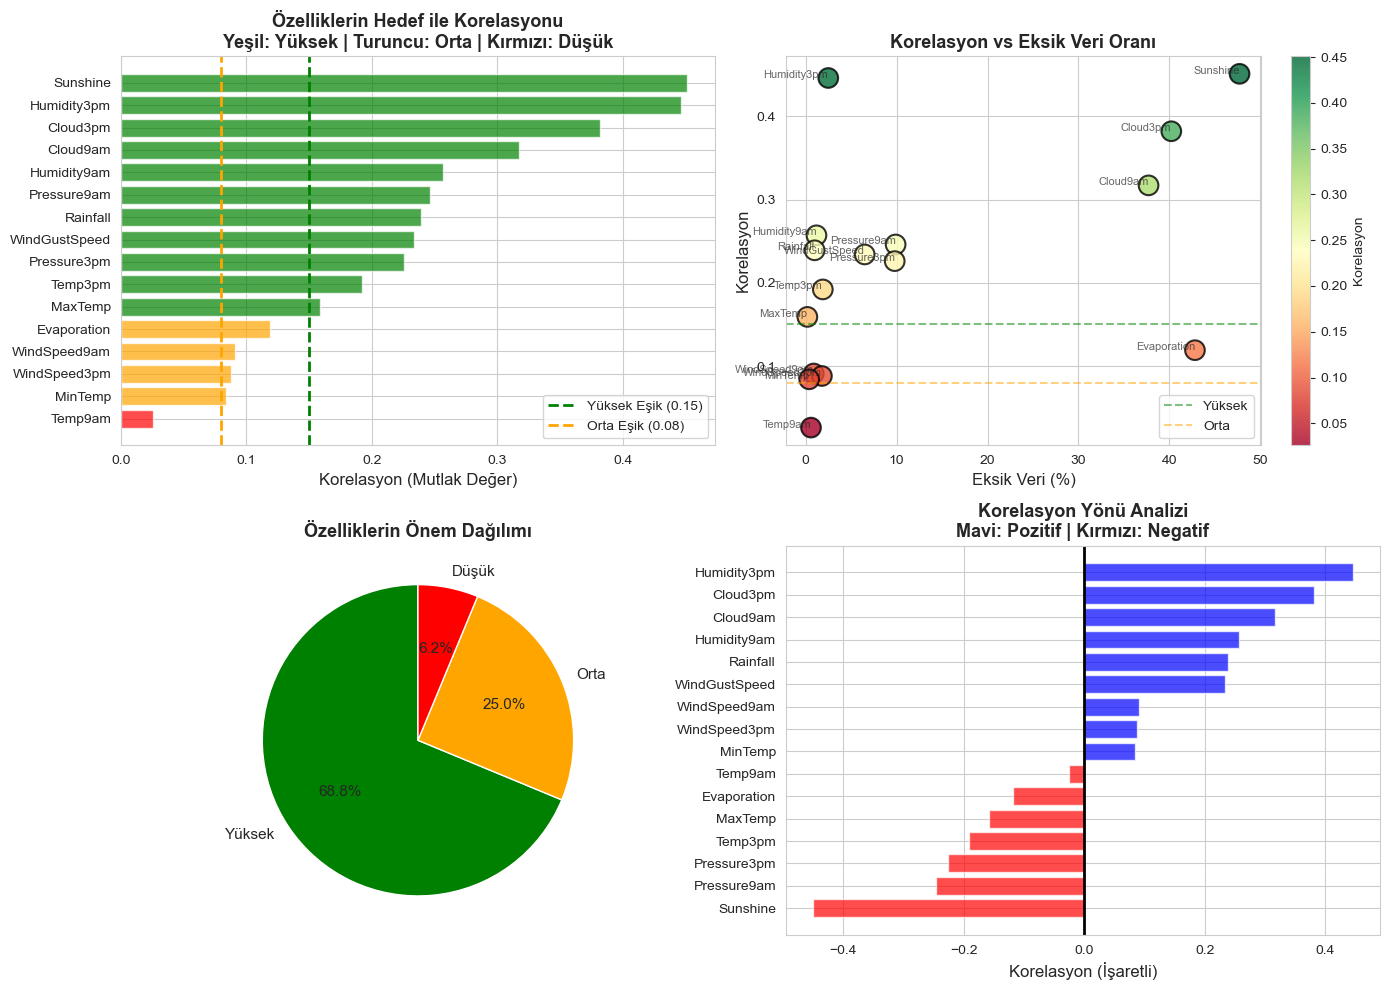


✅ Grafik 'korelasyon_analizi.png' olarak kaydedildi!


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stili
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# 1. KORELASYON BARPLOT (En önemli grafik)
plt.subplot(2, 2, 1)
colors = ['green' if x == 'Yüksek' else 'orange' if x == 'Orta' else 'red' for x in results_df['Önem']]
plt.barh(results_df['Kolon'], results_df['Corr'], color=colors, alpha=0.7)
plt.xlabel('Korelasyon (Mutlak Değer)', fontsize=12)
plt.title('Özelliklerin Hedef ile Korelasyonu\nYeşil: Yüksek | Turuncu: Orta | Kırmızı: Düşük', fontsize=13, fontweight='bold')
plt.axvline(x=0.15, color='green', linestyle='--', linewidth=2, label='Yüksek Eşik (0.15)')
plt.axvline(x=0.08, color='orange', linestyle='--', linewidth=2, label='Orta Eşik (0.08)')
plt.legend()
plt.gca().invert_yaxis()

# 2. KORELASYON vs EKSİK VERİ SCATTER
plt.subplot(2, 2, 2)
scatter = plt.scatter(results_df['Eksik_%'], results_df['Corr'], 
                     s=200, c=results_df['Corr'], cmap='RdYlGn', 
                     edgecolors='black', linewidth=1.5, alpha=0.8)
plt.xlabel('Eksik Veri (%)', fontsize=12)
plt.ylabel('Korelasyon', fontsize=12)
plt.title('Korelasyon vs Eksik Veri Oranı', fontsize=13, fontweight='bold')
plt.axhline(y=0.15, color='green', linestyle='--', alpha=0.5, label='Yüksek')
plt.axhline(y=0.08, color='orange', linestyle='--', alpha=0.5, label='Orta')
plt.colorbar(scatter, label='Korelasyon')
plt.legend()

# Her noktaya etiket ekle
for idx, row in results_df.iterrows():
    plt.annotate(row['Kolon'], (row['Eksik_%'], row['Corr']), 
                fontsize=8, ha='right', alpha=0.7)

# 3. ÖNEM KATEGORİLERİ PASTa
plt.subplot(2, 2, 3)
onem_counts = results_df['Önem'].value_counts()
colors_pie = ['green', 'orange', 'red']
plt.pie(onem_counts, labels=onem_counts.index, autopct='%1.1f%%', 
        colors=colors_pie, startangle=90, textprops={'fontsize': 11})
plt.title('Özelliklerin Önem Dağılımı', fontsize=13, fontweight='bold')

# 4. KORELASYON YÖN ANALİZİ
plt.subplot(2, 2, 4)
yon_data = results_df.copy()
yon_data['Corr_Signed'] = yon_data.apply(lambda x: x['Corr'] if x['Yön'] == '+' else -x['Corr'], axis=1)
yon_data = yon_data.sort_values('Corr_Signed')
colors_yon = ['red' if x == '-' else 'blue' for x in yon_data['Yön']]
plt.barh(yon_data['Kolon'], yon_data['Corr_Signed'], color=colors_yon, alpha=0.7)
plt.xlabel('Korelasyon (İşaretli)', fontsize=12)
plt.title('Korelasyon Yönü Analizi\nMavi: Pozitif | Kırmızı: Negatif', fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linewidth=2)

plt.tight_layout()
plt.savefig('korelasyon_analizi.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik 'korelasyon_analizi.png' olarak kaydedildi!")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [19]:
drop_list = ["WindSpeed9am","WindSpeed3pm","Evaporation","WindDir3pm","WindDir9am","WindGustDir"]

In [20]:
df.drop(drop_list,axis=1,inplace=True)

In [21]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,44.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,44.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,46.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,24.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Sunshine       74377 non-null   float64
 6   WindGustSpeed  132923 non-null  float64
 7   Humidity9am    140419 non-null  float64
 8   Humidity3pm    138583 non-null  float64
 9   Pressure9am    128179 non-null  float64
 10  Pressure3pm    128212 non-null  float64
 11  Cloud9am       88536 non-null   float64
 12  Cloud3pm       85099 non-null   float64
 13  Temp9am        141289 non-null  float64
 14  Temp3pm        139467 non-null  float64
 15  RainToday      140787 non-null  object 
 16  RISK_MM        142193 non-null  float64
 17  RainTomorrow   142193 non-nul

In [23]:
# Now we need fill null rows with mean the month

In [24]:
df["Date"] = pd.to_datetime(df["Date"])

df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [25]:
df.head(
)

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,44.0,71.0,22.0,1007.7,...,8.0,NaN,16.9,21.8,No,0.0,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,44.0,44.0,25.0,1010.6,...,NaN,NaN,17.2,24.3,No,0.0,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,46.0,38.0,30.0,1007.6,...,NaN,2.0,21.0,23.2,No,0.0,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,24.0,45.0,16.0,1017.6,...,NaN,NaN,18.1,26.5,No,1.0,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,41.0,82.0,33.0,1010.8,...,7.0,8.0,17.8,29.7,No,0.2,No,5,12,2008


In [26]:
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed',
                'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']

In [27]:
for col in numeric_cols:
    df[col] = df.groupby('Month')[col].transform(lambda x: x.fillna(x.mean()))

In [28]:
print(df.isnull().sum())

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Sunshine            0
WindGustSpeed       0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        1406
RISK_MM             0
RainTomorrow        0
Day                 0
Month               0
Year                0
dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Sunshine       142193 non-null  float64       
 6   WindGustSpeed  142193 non-null  float64       
 7   Humidity9am    142193 non-null  float64       
 8   Humidity3pm    142193 non-null  float64       
 9   Pressure9am    142193 non-null  float64       
 10  Pressure3pm    142193 non-null  float64       
 11  Cloud9am       142193 non-null  float64       
 12  Cloud3pm       142193 non-null  float64       
 13  Temp9am        142193 non-null  float64       
 14  Temp3pm        142193 non-null  float64       
 15  

In [30]:
df = df.dropna()

In [31]:
print(df.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140787 non-null  float64       
 3   MaxTemp        140787 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Sunshine       140787 non-null  float64       
 6   WindGustSpeed  140787 non-null  float64       
 7   Humidity9am    140787 non-null  float64       
 8   Humidity3pm    140787 non-null  float64       
 9   Pressure9am    140787 non-null  float64       
 10  Pressure3pm    140787 non-null  float64       
 11  Cloud9am       140787 non-null  float64       
 12  Cloud3pm       140787 non-null  float64       
 13  Temp9am        140787 non-null  float64       
 14  Temp3pm        140787 non-null  float64       
 15  RainT

In [33]:
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [34]:
##Target encoding
location_rain_rate = df.groupby('Location')['RainTomorrow'].apply(lambda x: (x == 'Yes').mean())

df['Location_RainRate'] = df['Location'].map(location_rain_rate)

# Artık Location kolonunu silebilirsin
df = df.drop('Location', axis=1)

In [35]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year,Location_RainRate
0,2008-12-01,13.4,22.9,0.6,8.975372,44.0,71.0,22.0,1007.7,1007.1,...,4.510468,16.9,21.8,No,0.0,No,1,12,2008,0.205617
1,2008-12-02,7.4,25.1,0.0,8.975372,44.0,44.0,25.0,1010.6,1007.8,...,4.510468,17.2,24.3,No,0.0,No,2,12,2008,0.205617
2,2008-12-03,12.9,25.7,0.0,8.975372,46.0,38.0,30.0,1007.6,1008.7,...,2.000000,21.0,23.2,No,0.0,No,3,12,2008,0.205617
3,2008-12-04,9.2,28.0,0.0,8.975372,24.0,45.0,16.0,1017.6,1012.8,...,4.510468,18.1,26.5,No,1.0,No,4,12,2008,0.205617
4,2008-12-05,17.5,32.3,1.0,8.975372,41.0,82.0,33.0,1010.8,1006.0,...,8.000000,17.8,29.7,No,0.2,No,5,12,2008,0.205617


In [36]:
df["Location_RainRate"].unique()

array([0.20561685, 0.19812304, 0.12852349, 0.29319728, 0.12755285,
       0.24274496, 0.27562327, 0.30842391, 0.1985572 , 0.18995182,
       0.25908136, 0.25658114, 0.17680865, 0.23779461, 0.23955148,
       0.18371546, 0.18959108, 0.27805398, 0.25820351, 0.18514851,
       0.21490642, 0.21701562, 0.23194082, 0.10881864, 0.15463259,
       0.3669571 , 0.24481605, 0.31303164, 0.22509579, 0.31545209,
       0.26060192, 0.16980509, 0.21688742, 0.30277962, 0.19626168,
       0.06635389, 0.29739653, 0.29753762, 0.16024187, 0.1884347 ,
       0.20200438, 0.15980959, 0.33790614, 0.23845429, 0.22913907,
       0.08      , 0.26691729, 0.16504854, 0.07656458])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               140787 non-null  datetime64[ns]
 1   MinTemp            140787 non-null  float64       
 2   MaxTemp            140787 non-null  float64       
 3   Rainfall           140787 non-null  float64       
 4   Sunshine           140787 non-null  float64       
 5   WindGustSpeed      140787 non-null  float64       
 6   Humidity9am        140787 non-null  float64       
 7   Humidity3pm        140787 non-null  float64       
 8   Pressure9am        140787 non-null  float64       
 9   Pressure3pm        140787 non-null  float64       
 10  Cloud9am           140787 non-null  float64       
 11  Cloud3pm           140787 non-null  float64       
 12  Temp9am            140787 non-null  float64       
 13  Temp3pm            140787 non-null  float64      

In [38]:
df = pd.get_dummies(df,columns=["RainToday","RainTomorrow"],drop_first=True)

In [39]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Day,Month,Year,Location_RainRate,RainToday_Yes,RainTomorrow_Yes
0,2008-12-01,13.4,22.9,0.6,8.975372,44.0,71.0,22.0,1007.7,1007.1,...,4.510468,16.9,21.8,0.0,1,12,2008,0.205617,False,False
1,2008-12-02,7.4,25.1,0.0,8.975372,44.0,44.0,25.0,1010.6,1007.8,...,4.510468,17.2,24.3,0.0,2,12,2008,0.205617,False,False
2,2008-12-03,12.9,25.7,0.0,8.975372,46.0,38.0,30.0,1007.6,1008.7,...,2.000000,21.0,23.2,0.0,3,12,2008,0.205617,False,False
3,2008-12-04,9.2,28.0,0.0,8.975372,24.0,45.0,16.0,1017.6,1012.8,...,4.510468,18.1,26.5,1.0,4,12,2008,0.205617,False,False
4,2008-12-05,17.5,32.3,1.0,8.975372,41.0,82.0,33.0,1010.8,1006.0,...,8.000000,17.8,29.7,0.2,5,12,2008,0.205617,False,False


In [40]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Day,Month,Year,Location_RainRate,RainToday_Yes,RainTomorrow_Yes
0,2008-12-01,13.4,22.9,0.6,8.975372,44.0,71.0,22.0,1007.7,1007.1,...,4.510468,16.9,21.8,0.0,1,12,2008,0.205617,False,False
1,2008-12-02,7.4,25.1,0.0,8.975372,44.0,44.0,25.0,1010.6,1007.8,...,4.510468,17.2,24.3,0.0,2,12,2008,0.205617,False,False
2,2008-12-03,12.9,25.7,0.0,8.975372,46.0,38.0,30.0,1007.6,1008.7,...,2.000000,21.0,23.2,0.0,3,12,2008,0.205617,False,False
3,2008-12-04,9.2,28.0,0.0,8.975372,24.0,45.0,16.0,1017.6,1012.8,...,4.510468,18.1,26.5,1.0,4,12,2008,0.205617,False,False
4,2008-12-05,17.5,32.3,1.0,8.975372,41.0,82.0,33.0,1010.8,1006.0,...,8.000000,17.8,29.7,0.2,5,12,2008,0.205617,False,False


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               140787 non-null  datetime64[ns]
 1   MinTemp            140787 non-null  float64       
 2   MaxTemp            140787 non-null  float64       
 3   Rainfall           140787 non-null  float64       
 4   Sunshine           140787 non-null  float64       
 5   WindGustSpeed      140787 non-null  float64       
 6   Humidity9am        140787 non-null  float64       
 7   Humidity3pm        140787 non-null  float64       
 8   Pressure9am        140787 non-null  float64       
 9   Pressure3pm        140787 non-null  float64       
 10  Cloud9am           140787 non-null  float64       
 11  Cloud3pm           140787 non-null  float64       
 12  Temp9am            140787 non-null  float64       
 13  Temp3pm            140787 non-null  float64      

In [42]:
#Cycial Encoding

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)

df = df.drop(['Date', 'Day', 'Month', 'Year'], axis=1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MinTemp            140787 non-null  float64
 1   MaxTemp            140787 non-null  float64
 2   Rainfall           140787 non-null  float64
 3   Sunshine           140787 non-null  float64
 4   WindGustSpeed      140787 non-null  float64
 5   Humidity9am        140787 non-null  float64
 6   Humidity3pm        140787 non-null  float64
 7   Pressure9am        140787 non-null  float64
 8   Pressure3pm        140787 non-null  float64
 9   Cloud9am           140787 non-null  float64
 10  Cloud3pm           140787 non-null  float64
 11  Temp9am            140787 non-null  float64
 12  Temp3pm            140787 non-null  float64
 13  RISK_MM            140787 non-null  float64
 14  Location_RainRate  140787 non-null  float64
 15  RainToday_Yes      140787 non-null  bool   
 16  RainTom

In [43]:
df.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,...,Temp9am,Temp3pm,RISK_MM,Location_RainRate,RainToday_Yes,RainTomorrow_Yes,Month_sin,Month_cos,Day_sin,Day_cos
0,13.4,22.9,0.6,8.975372,44.0,71.0,22.0,1007.7,1007.1,8.000000,...,16.9,21.8,0.0,0.205617,False,False,-2.449294e-16,1.0,0.201299,0.979530
1,7.4,25.1,0.0,8.975372,44.0,44.0,25.0,1010.6,1007.8,4.647435,...,17.2,24.3,0.0,0.205617,False,False,-2.449294e-16,1.0,0.394356,0.918958
2,12.9,25.7,0.0,8.975372,46.0,38.0,30.0,1007.6,1008.7,4.647435,...,21.0,23.2,0.0,0.205617,False,False,-2.449294e-16,1.0,0.571268,0.820763
3,9.2,28.0,0.0,8.975372,24.0,45.0,16.0,1017.6,1012.8,4.647435,...,18.1,26.5,1.0,0.205617,False,False,-2.449294e-16,1.0,0.724793,0.688967
4,17.5,32.3,1.0,8.975372,41.0,82.0,33.0,1010.8,1006.0,7.000000,...,17.8,29.7,0.2,0.205617,False,False,-2.449294e-16,1.0,0.848644,0.528964


In [44]:
df["RainTomorrow_Yes"].unique()

array([False,  True])

In [45]:
df["RainTomorrow_Yes"].value_counts()

#We have imbalanced dataset so we need to use class weight

RainTomorrow_Yes
False    109586
True      31201
Name: count, dtype: int64

In [46]:
X = df.drop(["RainTomorrow_Yes","RISK_MM"],axis=1)
y = df["RainTomorrow_Yes"]

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [48]:
model = LogisticRegression()

In [49]:
penalty = ["l1","l2","elasticnet"]
c_values = [10 , 1 , 0.1]
solver = ["lbfgs","newton-cholesky"]
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [50]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [51]:
params = dict(penalty=penalty , C=c_values,solver=solver,class_weight = class_weight)

In [52]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [10, 1, 0.1],
 'solver': ['lbfgs', 'newton-cholesky'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [53]:
grid  = GridSearchCV(estimator=model , param_grid=params,scoring="accuracy",cv=5,verbose=3,n_jobs=-1)

In [54]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 1, 0.1],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cholesky']},
             scoring='accuracy', verbose=3)

In [55]:
grid.best_params_

{'C': 0.1,
 'class_weight': {0: 50, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cholesky'}

In [56]:
grid.best_score_

np.float64(0.8444951801116185)

In [57]:
model = LogisticRegression()

In [58]:
randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,n_iter=10,scoring="accuracy")

In [59]:
randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [10, 1, 0.1],
                                        'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 10},
                                                         {0: 1, 1: 50},
                                                         {0: 1, 1: 100},
                                                         {0: 10, 1: 1},
                                                         {0: 10, 1: 10},
                                                         {0: 10, 1: 50},
                                                         {0: 10, 1: 100},
                                                         {0: 50, 1: 1},
                                                         {0: 50, 1: 10},
                                                         {0: 50, 1: 50},
                                                         {0: 50, 1: 100},
                                                         {0: 100, 1: 1},
                                                         {0: 100, 1: 10},
                                                         {0: 100, 1: 50},
                                                         {0: 100, 1: 100}],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'newton-cholesky']},
                   scoring='accuracy')

In [60]:
randomcv.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': {0: 1, 1: 1}, 'C': 1}

In [61]:
randomcv.best_score_.item()

0.8393607305936073

In [62]:
y_pred = randomcv.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
score = accuracy_score(y_pred,y_test)
print("score :",score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n",confusion_matrix(y_pred,y_test))

score : 0.8412529298955892
              precision    recall  f1-score   support

       False       0.95      0.86      0.90     36150
        True       0.47      0.72      0.56      6087

    accuracy                           0.84     42237
   macro avg       0.71      0.79      0.73     42237
weighted avg       0.88      0.84      0.85     42237

confusion matrix: 
 [[31179  4971]
 [ 1734  4353]]
